In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
sns.set_style('darkgrid')
sns.set_context('talk')
sns.set_palette('OrRd')

In [2]:
counties=pd.read_csv('counties_storedecline.csv')
counties.head()

,FIPS,State,County,decline,GROCPTH09,WICSPTH08,FFRPTH09,FSRPTH09,PC_FFRSALES07,PC_FSRSALES07,...,METRO13,POPLOSS10,MEDHHINC15,PCT_LACCESS_POP10,SNAP_PART_RATE08,PCT_NSLP09,PCT_WIC09,PCT_CACFP09,PCT_DIABETES_ADULTS08,PCT_OBESE_ADULTS08
0,1001,AL,Autauga,1,0.110834,0.119156,0.554170,0.628059,649.511367,484.381507,...,1,0.0,56580.0,33.769657,67,12.315055,2.990417,0.91609,11.4,31.5
1,1003,AL,Baldwin,0,0.133775,0.141875,0.624282,1.125938,649.511367,484.381507,...,1,0.0,52387.0,19.318473,67,12.315055,2.990417,0.91609,9.8,26.2
2,1005,AL,Barbour,0,0.180786,0.201099,0.759301,0.433887,649.511367,484.381507,...,0,0.0,31433.0,20.840972,67,12.315055,2.990417,0.91609,13.6,37.6
3,1007,AL,Bibb,1,0.261540,0.277919,0.305131,0.261540,649.511367,484.381507,...,1,0.0,40767.0,4.559753,67,12.315055,2.990417,0.91609,11.1,32.3
4,1009,AL,Blount,1,0.104637,0.173028,0.418549,0.331351,649.511367,484.381507,...,1,0.0,50487.0,2.700840,67,12.315055,2.990417,0.91609,11.4,31.9


## Confirm data is ready for analysis

In [3]:
# Confirm no missing values
counties.isnull().sum()

FIPS                     0
State                    0
County                   0
decline                  0
GROCPTH09                0
WICSPTH08                0
FFRPTH09                 0
FSRPTH09                 0
PC_FFRSALES07            0
PC_FSRSALES07            0
PCT_NHWHITE10            0
PCT_65OLDER10            0
PCT_18YOUNGER10          0
PERPOV10                 0
METRO13                  0
POPLOSS10                0
MEDHHINC15               0
PCT_LACCESS_POP10        0
SNAP_PART_RATE08         0
PCT_NSLP09               0
PCT_WIC09                0
PCT_CACFP09              0
PCT_DIABETES_ADULTS08    0
PCT_OBESE_ADULTS08       0
dtype: int64

In [4]:
# Confirm all columns are numeric
counties.dtypes

FIPS                       int64
State                     object
County                    object
decline                    int64
GROCPTH09                float64
WICSPTH08                float64
FFRPTH09                 float64
FSRPTH09                 float64
PC_FFRSALES07            float64
PC_FSRSALES07            float64
PCT_NHWHITE10            float64
PCT_65OLDER10            float64
PCT_18YOUNGER10          float64
PERPOV10                   int64
METRO13                    int64
POPLOSS10                float64
MEDHHINC15               float64
PCT_LACCESS_POP10        float64
SNAP_PART_RATE08           int64
PCT_NSLP09               float64
PCT_WIC09                float64
PCT_CACFP09              float64
PCT_DIABETES_ADULTS08    float64
PCT_OBESE_ADULTS08       float64
dtype: object

In [5]:
# Confirm no extreme minimums
counties.min()

FIPS                          1001
State                           AK
County                   Abbeville
decline                          0
GROCPTH09                        0
WICSPTH08                        0
FFRPTH09                         0
FSRPTH09                         0
PC_FFRSALES07              402.098
PC_FSRSALES07              371.845
PCT_NHWHITE10              2.86041
PCT_65OLDER10               3.4706
PCT_18YOUNGER10            9.11154
PERPOV10                         0
METRO13                          0
POPLOSS10                        0
MEDHHINC15                   22894
PCT_LACCESS_POP10                0
SNAP_PART_RATE08                48
PCT_NSLP09                  6.9543
PCT_WIC09                  1.38626
PCT_CACFP09               0.387918
PCT_DIABETES_ADULTS08            3
PCT_OBESE_ADULTS08            11.7
dtype: object

In [6]:
# Confirm no extreme maximums
counties.max()

FIPS                       56045
State                         WY
County                   Ziebach
decline                        1
GROCPTH09                3.07377
WICSPTH08                4.61894
FFRPTH09                 6.08828
FSRPTH09                 13.6986
PC_FFRSALES07            1043.86
PC_FSRSALES07            1930.16
PCT_NHWHITE10            99.1632
PCT_65OLDER10            43.3847
PCT_18YOUNGER10          40.1269
PERPOV10                       1
METRO13                        1
POPLOSS10                      1
MEDHHINC15                125900
PCT_LACCESS_POP10            100
SNAP_PART_RATE08             100
PCT_NSLP09               13.7438
PCT_WIC09                5.07887
PCT_CACFP09              2.55255
PCT_DIABETES_ADULTS08       18.2
PCT_OBESE_ADULTS08          43.7
dtype: object

In [7]:
# Is the target imbalanced?
counties['decline'].value_counts()

1    1739
0    1395
Name: decline, dtype: int64

## Store Features
Grocery stores (% change), 2009-14	PCH_GROC_09_14  
Grocery stores/1,000 pop, 2009	GROCPTH09  
WIC-authorized stores/1,000 pop, 2008	WICSPTH08

            decline  GROCPTH09  WICSPTH08
decline    1.000000   0.100077  -0.034405
GROCPTH09  0.100077   1.000000   0.610591
WICSPTH08 -0.034405   0.610591   1.000000


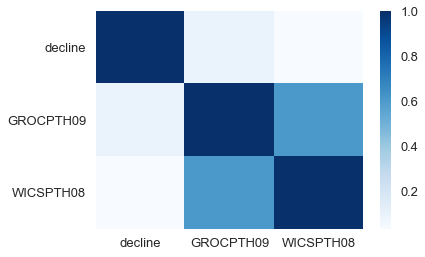

In [8]:
# Are they correlated with the target variable?
corr=counties[['decline', 'GROCPTH09',  'WICSPTH08']].corr()
print(corr)
new=abs(corr)
sns.heatmap(new, cmap='Blues');

## Restaurants
Fast-food restaurants/1,000 pop, 2009	FFRPTH09  
Full-service restaurants/1,000 pop, 2009	FSRPTH09  
Expenditures per capita, fast food, 2007	PC_FFRSALES07  
Expenditures per capita, restaurants, 2007	PC_FSRSALES07  

                decline  FFRPTH09  FSRPTH09  PC_FFRSALES07  PC_FSRSALES07
decline        1.000000  0.041965 -0.049210       0.018126      -0.007308
FFRPTH09       0.041965  1.000000  0.358127       0.101382       0.119044
FSRPTH09      -0.049210  0.358127  1.000000      -0.087615       0.148766
PC_FFRSALES07  0.018126  0.101382 -0.087615       1.000000       0.495789
PC_FSRSALES07 -0.007308  0.119044  0.148766       0.495789       1.000000


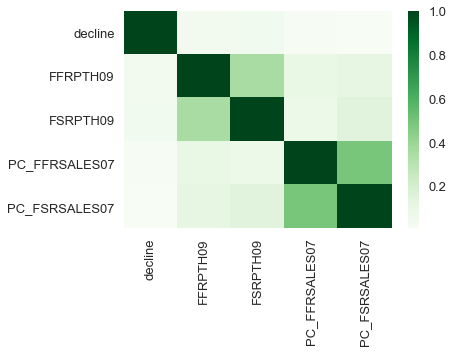

In [9]:
# Are they correlated with the target variable?
corr=counties[['decline', 'FFRPTH09', 'FSRPTH09', 'PC_FFRSALES07', 'PC_FSRSALES07']].corr()
print(corr)
new=abs(corr)
sns.heatmap(new, cmap='Greens');

## Socioeconomic Indicators
% White, 2010	PCT_NHWHITE10  
% Population 65 years or older, 2010	PCT_65OLDER10  
% Population under age 18, 2010	PCT_18YOUNGER10  
Persistent-poverty counties, 2010	PERPOV10  
Metro/nonmetro counties, 2010	METRO13  
Population-loss counties, 2010	POPLOSS10  

                  decline  PCT_NHWHITE10  PCT_65OLDER10  PCT_18YOUNGER10  \
decline          1.000000      -0.009221      -0.091902         0.070855   
PCT_NHWHITE10   -0.009221       1.000000       0.410622        -0.332495   
PCT_65OLDER10   -0.091902       0.410622       1.000000        -0.526336   
PCT_18YOUNGER10  0.070855      -0.332495      -0.526336         1.000000   
PERPOV10         0.008625      -0.415711      -0.105790         0.113597   
METRO13          0.032632      -0.107819      -0.395175         0.127975   
POPLOSS10       -0.071109       0.115827       0.358766        -0.096384   

                 PERPOV10   METRO13  POPLOSS10  
decline          0.008625  0.032632  -0.071109  
PCT_NHWHITE10   -0.415711 -0.107819   0.115827  
PCT_65OLDER10   -0.105790 -0.395175   0.358766  
PCT_18YOUNGER10  0.113597  0.127975  -0.096384  
PERPOV10         1.000000 -0.164303   0.043223  
METRO13         -0.164303  1.000000  -0.236386  
POPLOSS10        0.043223 -0.236386   1.000000  

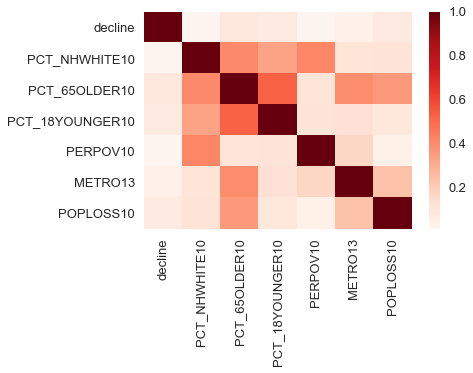

In [10]:
# Are they correlated with the target variable?
corr=counties[['decline', 'PCT_NHWHITE10', 'PCT_65OLDER10', 'PCT_18YOUNGER10', 'PERPOV10', 'METRO13', 'POPLOSS10']].corr()
print(corr)
new=abs(corr)
sns.heatmap(new, cmap='Reds');

# Health and Access to grocery store 
Population, low access to store (%), 2010	PCT_LACCESS_POP10  
Adult diabetes rate, 2008	PCT_DIABETES_ADULTS08  
Adult obesity rate, 2008	PCT_OBESE_ADULTS08

                        decline  PCT_LACCESS_POP10  PCT_DIABETES_ADULTS08  \
decline                1.000000          -0.059083               0.022387   
PCT_LACCESS_POP10     -0.059083           1.000000              -0.150669   
PCT_DIABETES_ADULTS08  0.022387          -0.150669               1.000000   
PCT_OBESE_ADULTS08     0.049625          -0.118116               0.723746   

                       PCT_OBESE_ADULTS08  
decline                          0.049625  
PCT_LACCESS_POP10               -0.118116  
PCT_DIABETES_ADULTS08            0.723746  
PCT_OBESE_ADULTS08               1.000000  


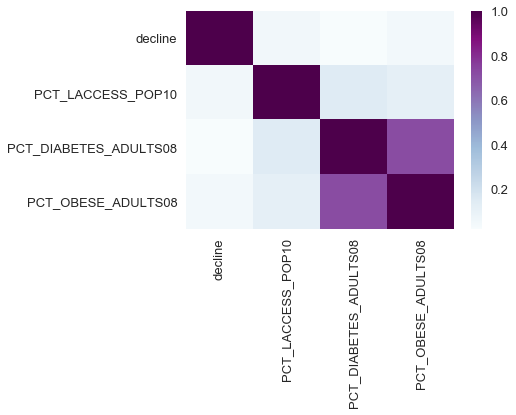

In [11]:
# Are they correlated with the target variable?
corr=counties[['decline', 'PCT_LACCESS_POP10', 'PCT_DIABETES_ADULTS08', 'PCT_OBESE_ADULTS08']].corr()
print(corr)
new=abs(corr)
sns.heatmap(new, cmap='BuPu');

## Assistance
SNAP participants (% eligible pop), 2008	SNAP_PART_RATE08  
National School Lunch Program participants (% pop), 2009	PCT_NSLP09   
WIC participants (% pop), 2009	PCT_WIC09  
Child & Adult Care (% pop), 2009	PCT_CACFP09

                   decline  SNAP_PART_RATE08  PCT_NSLP09  PCT_WIC09  \
decline           1.000000          0.039559    0.013584   0.021893   
SNAP_PART_RATE08  0.039559          1.000000   -0.099188  -0.300971   
PCT_NSLP09        0.013584         -0.099188    1.000000   0.524833   
PCT_WIC09         0.021893         -0.300971    0.524833   1.000000   
PCT_CACFP09      -0.001846         -0.122817    0.505863   0.172609   

                  PCT_CACFP09  
decline             -0.001846  
SNAP_PART_RATE08    -0.122817  
PCT_NSLP09           0.505863  
PCT_WIC09            0.172609  
PCT_CACFP09          1.000000  


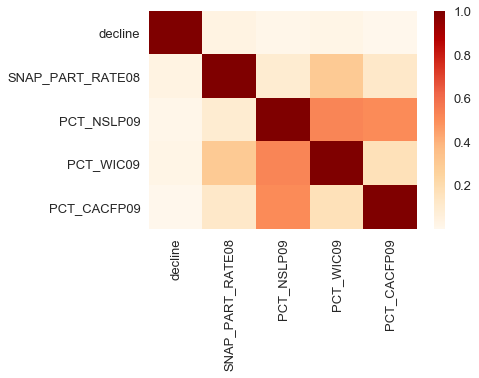

In [12]:
# Are they correlated with the target variable?
corr=counties[['decline', 'SNAP_PART_RATE08', 'PCT_NSLP09', 'PCT_WIC09', 'PCT_CACFP09']].corr()
print(corr)
new=abs(corr)
sns.heatmap(new, cmap='OrRd');

Ttest_indResult(statistic=-0.10328500875791562, pvalue=0.9177433858282894)

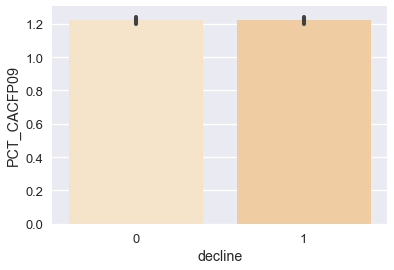

In [13]:
# There is no significant difference in the proposed target variable, between groups.
sns.barplot(y='PCT_CACFP09', x='decline', data=counties);
stats.ttest_ind(counties.loc[counties['decline']==1, 'PCT_CACFP09'], counties.loc[counties['decline']==0, 'PCT_CACFP09'])